# Problem Statement

<div style="border: double black; border-radius: 5px; max-width: 700px; margin: auto;">
<p>The objectives of this analysis is to perform customer segmentation in order to come up with marketing stratigies to increase revenue.</p>
</div>

<p>We have transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers. The data consists of the following attributes:</p>
<ul>
  <li>InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.</li>
  <li>StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.</li>
  <li>Description: Product (item) name. Nominal.</li>
  <li>Quantity: The quantities of each product (item) per transaction. Numeric.</li>
  <li>InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.</li>
  <li>UnitPrice: Unit price. Numeric, Product price per unit in sterling.</li>
  <li>CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.</li>
  <li>Country: Country name. Nominal, the name of the country where each customer resides.</li>
</ul>

## Data Exploration

In [3]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

# ignore warning
import warnings
warnings.filterwarnings('ignore')

# display multiple tables horizontally
from IPython.display import display, HTML
CSS = """
.output {
    flex-direction: row;
}
"""
HTML('<style>{}</style>'.format(CSS))

# read data from csv file
raw_data = pd.read_csv('data.csv')

# display data
display(raw_data)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


### Univariate Exploration

In [4]:
# display count for each columns
display(raw_data.count())

InvoiceNo      541909
StockCode      541909
Description    540455
Quantity       541909
InvoiceDate    541909
UnitPrice      541909
CustomerID     406829
Country        541909
dtype: int64

In [5]:
display(raw_data.Description.value_counts()[:15])
display(raw_data.StockCode.value_counts()[:15])

WHITE HANGING HEART T-LIGHT HOLDER    2369
REGENCY CAKESTAND 3 TIER              2200
JUMBO BAG RED RETROSPOT               2159
PARTY BUNTING                         1727
LUNCH BAG RED RETROSPOT               1638
ASSORTED COLOUR BIRD ORNAMENT         1501
SET OF 3 CAKE TINS PANTRY DESIGN      1473
PACK OF 72 RETROSPOT CAKE CASES       1385
LUNCH BAG  BLACK SKULL.               1350
NATURAL SLATE HEART CHALKBOARD        1280
POSTAGE                               1252
JUMBO BAG PINK POLKADOT               1251
HEART OF WICKER SMALL                 1237
JAM MAKING SET WITH JARS              1229
JUMBO STORAGE BAG SUKI                1214
Name: Description, dtype: int64

85123A    2313
22423     2203
85099B    2159
47566     1727
20725     1639
84879     1502
22720     1477
22197     1476
21212     1385
20727     1350
22383     1348
22457     1280
23203     1267
POST      1256
22386     1251
Name: StockCode, dtype: int64

In [6]:
print("Description = WHITE HANGING HEART T-LIGHT HOLDER")
display(raw_data[raw_data.Description=="WHITE HANGING HEART T-LIGHT HOLDER"].StockCode.value_counts())
print("StockCode = 85123A")
display(raw_data[raw_data.StockCode=="85123A"].Description.value_counts())
print("StockCode = 85123a")
display(raw_data[raw_data.StockCode=="85123a"].Description.value_counts())

# converting every StockCode entry to uppercase 
raw_data.StockCode = raw_data.StockCode.str.upper()

Description = WHITE HANGING HEART T-LIGHT HOLDER


85123A    2302
85123a      67
Name: StockCode, dtype: int64

StockCode = 85123A


WHITE HANGING HEART T-LIGHT HOLDER    2302
CREAM HANGING HEART T-LIGHT HOLDER       9
?                                        1
wrongly marked carton 22804              1
Name: Description, dtype: int64

StockCode = 85123a


WHITE HANGING HEART T-LIGHT HOLDER    67
Name: Description, dtype: int64

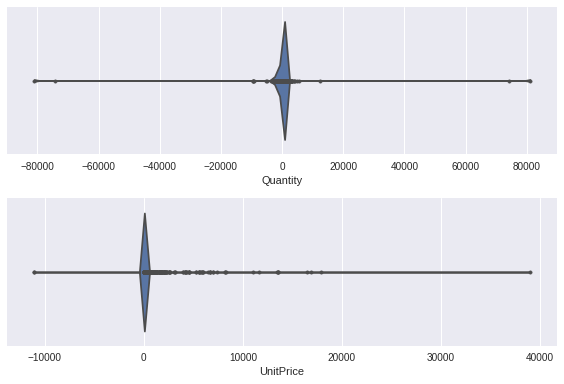

In [7]:
plt.subplot(211)
sb.violinplot(x=raw_data["Quantity"], inner="point")

plt.subplot(212)
sb.violinplot(x=raw_data["UnitPrice"], inner="point")

plt.tight_layout()
plt.show()

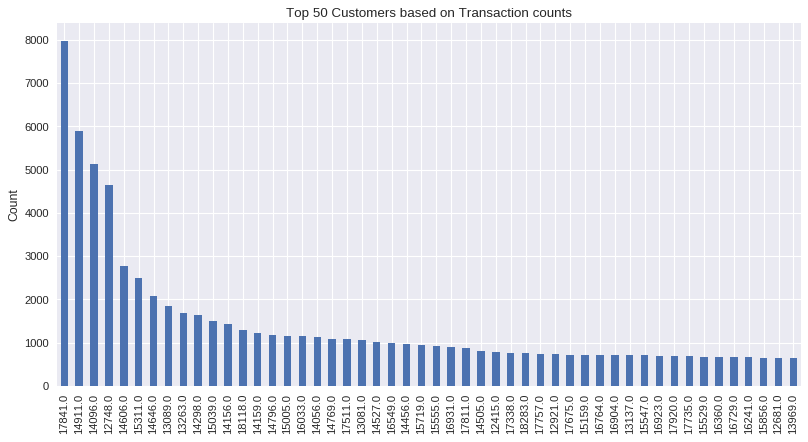

In [8]:
plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
raw_data.CustomerID.value_counts().head(50).plot.bar()
plt.title("Top 50 Customers based on Transaction counts")
plt.ylabel("Count")
plt.show()

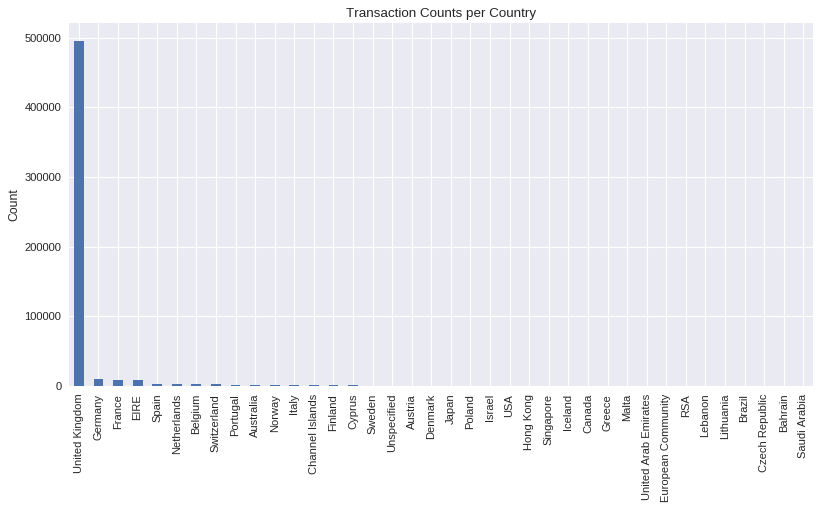

In [9]:
plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
raw_data.Country.value_counts().plot.bar()
plt.title("Transaction Counts per Country")
plt.ylabel("Count")
plt.show()

### Bivariate Exploration

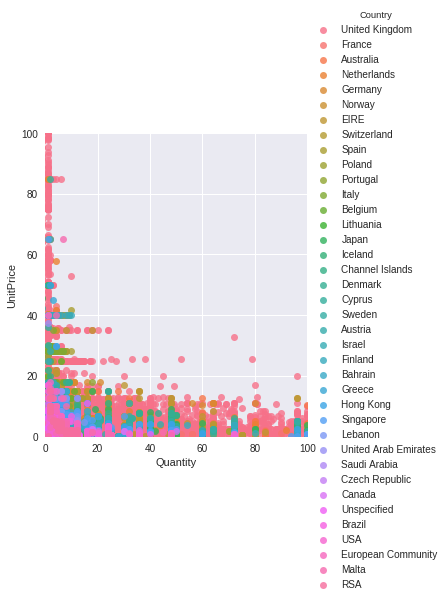

In [10]:
sb.lmplot(x="Quantity", y="UnitPrice", hue="Country", data=raw_data, fit_reg=False)
plt.ylim([0,100])
plt.xlim([0,100])
plt.show()

### Missing Values

In [11]:
# display entires with missing data
display(raw_data[raw_data.isnull().any(axis=1)])
display(raw_data[raw_data.isnull().any(axis=1)].count())

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom
1447,536544,21790,VINTAGE SNAP CARDS,9,12/1/2010 14:32,1.66,NaN,United Kingdom
1448,536544,21791,VINTAGE HEADS AND TAILS CARD GAME,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1449,536544,21801,CHRISTMAS TREE DECORATION WITH BELL,10,12/1/2010 14:32,0.43,NaN,United Kingdom
1450,536544,21802,CHRISTMAS TREE HEART DECORATION,9,12/1/2010 14:32,0.43,NaN,United Kingdom
1451,536544,21803,CHRISTMAS TREE STAR DECORATION,11,12/1/2010 14:32,0.43,NaN,United Kingdom


InvoiceNo      135080
StockCode      135080
Description    133626
Quantity       135080
InvoiceDate    135080
UnitPrice      135080
CustomerID          0
Country        135080
dtype: int64

In [12]:
# removing incomplete entries
raw_data=raw_data.dropna()

raw_data.count()

InvoiceNo      406829
StockCode      406829
Description    406829
Quantity       406829
InvoiceDate    406829
UnitPrice      406829
CustomerID     406829
Country        406829
dtype: int64

### Data Transformation and Feature Engineering

In [13]:
# the following code will split the data into transactions that went through and those that were canceled
# transitions that went through
#normal_data = raw_data[~raw_data.InvoiceNo.str.startswith("C")]
# transitions that were cancled
#canceled_data = raw_data[raw_data.InvoiceNo.str.startswith("C")]
normal_data = raw_data

# the following code will split the data into transactions in UK an outside UK
# transitions involved in United Kingdom
normal_data_uk = normal_data[normal_data.Country=="United Kingdom"]
normal_data_uk["Price"] = normal_data_uk["Quantity"] * normal_data_uk["UnitPrice"]
normal_data_uk["InvoiceDate"] = pd.to_datetime(normal_data_uk["InvoiceDate"])
# transitions involved in other countries
normal_data_other = normal_data[normal_data.Country!="United Kingdom"]
normal_data_other["Price"] = normal_data_other["Quantity"] * normal_data_other["UnitPrice"]
normal_data_other["InvoiceDate"] = pd.to_datetime(normal_data_other["InvoiceDate"])

In [14]:
# Creating a map between the Stock Code and Despcription for latter use
products = raw_data[["StockCode", "Description"]].drop_duplicates()

# Creating customer tables with schema sales price, average recency, Quantity of Items 
customer_time_table=normal_data_uk.drop(["Description", "Country", "UnitPrice"], axis=1).groupby(["CustomerID", "InvoiceDate"], as_index=False).agg({"StockCode":"count", "Quantity":"sum", "Price":"sum"})
customer_time_table.columns = ["CustomerID", "InvoiceDate", "Total_Quantity", "Net_Price", "Products"]
# Calculating time in days between each purchace
customer_time_table['Recency'] = (customer_time_table['InvoiceDate']-customer_time_table['InvoiceDate'].shift()).fillna(0).apply(lambda r: r.total_seconds()/60.0/60.0/24.0 if r>pd.Timedelta(0) else 0)
# Calculating final table
customer_table = customer_time_table.groupby("CustomerID", as_index=False).agg({"InvoiceDate":"count", "Total_Quantity":"sum", "Net_Price":"sum", "Products":"sum", "Recency":"mean"})
customer_table.columns = ["CustomerID", "Avg_Recency", "Total_Quantity", "Num_Products", "Num_Invoice", "Total_Price"]
# droping customers with zero total price as these people returned thier puechased products
customer_table = customer_table[customer_table.Total_Price!=0]

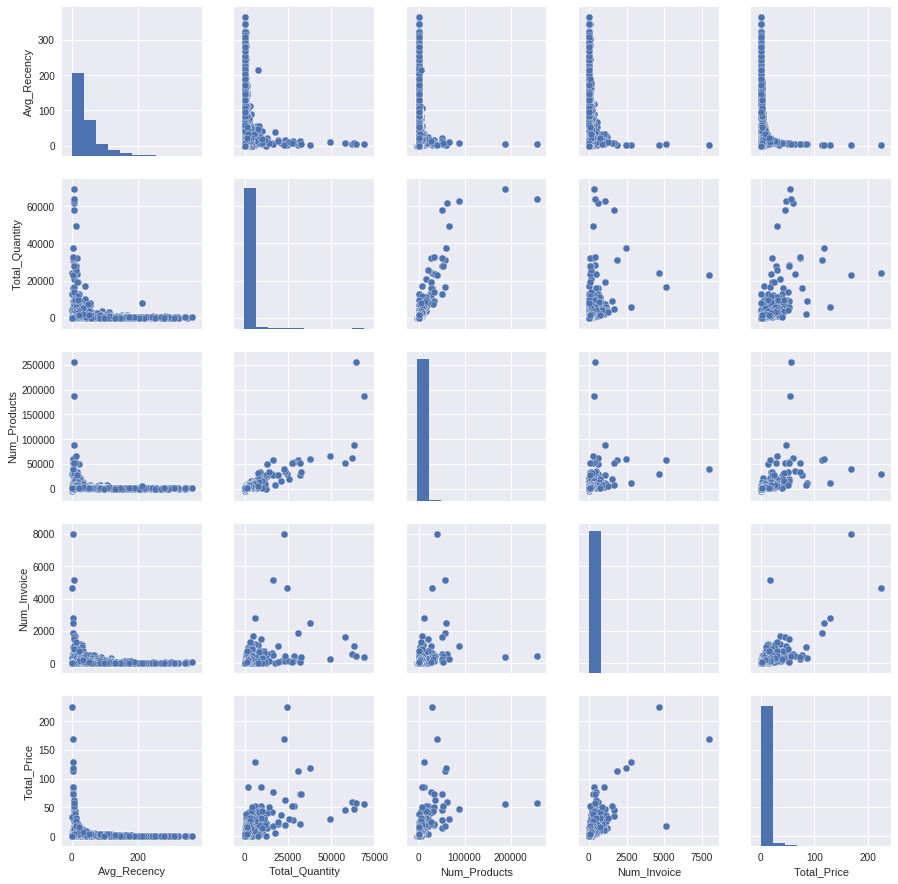

In [15]:
grid=sb.pairplot(customer_table.set_index("CustomerID"))
plt.show()

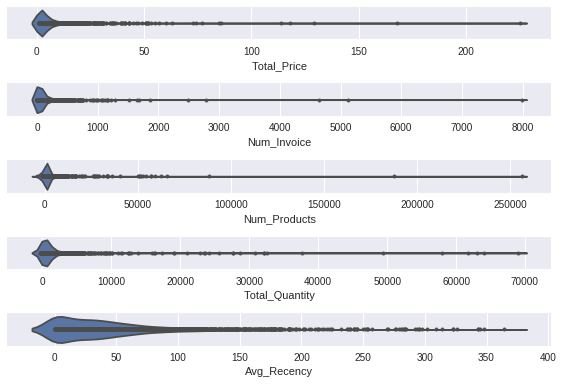

In [16]:
plt.subplot(511)
sb.violinplot(customer_table["Total_Price"], inner="point")
plt.subplot(512)
sb.violinplot(customer_table["Num_Invoice"], inner="point")
plt.subplot(513)
sb.violinplot(customer_table["Num_Products"], inner="point")
plt.subplot(514)
sb.violinplot(customer_table["Total_Quantity"], inner="point")
plt.subplot(515)
sb.violinplot(customer_table["Avg_Recency"], inner="point")
plt.tight_layout()
plt.show()

## Clustering

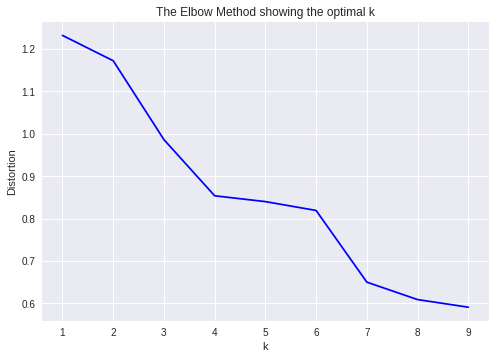

In [47]:
## Clustering

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(customer_table.set_index("CustomerID"))

# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
 
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Counter({0: 3020, 1: 16, 2: 313, 3: 601})

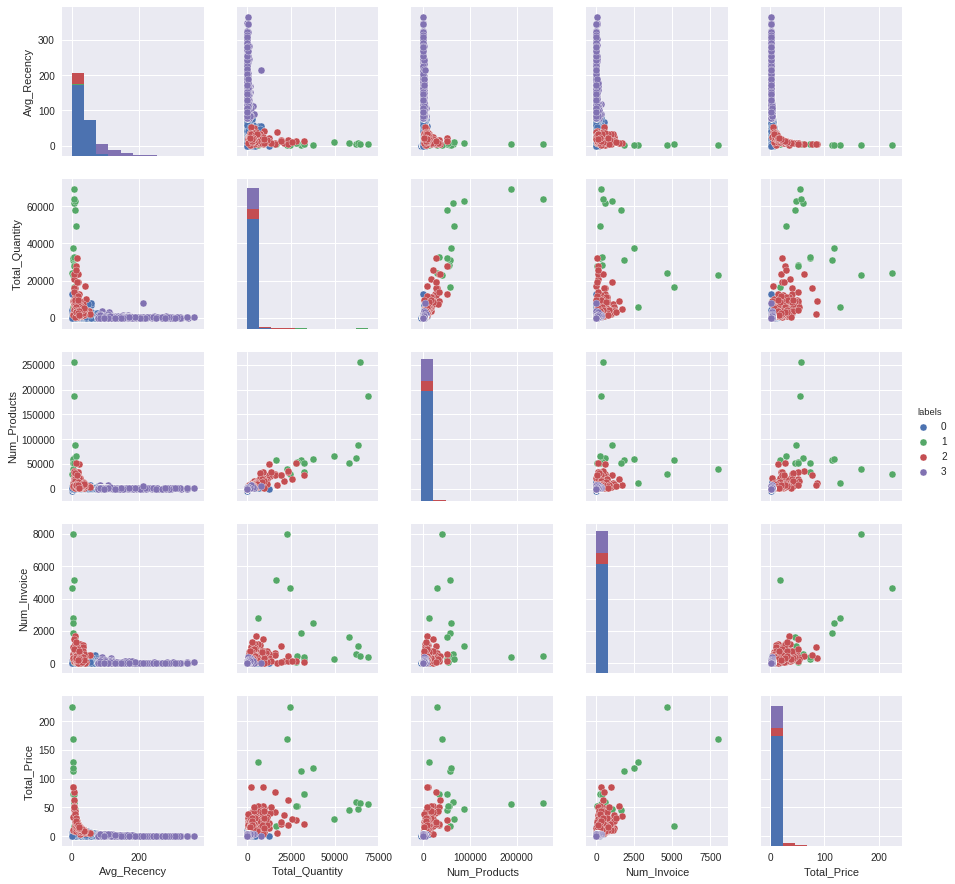

In [49]:
# displaying clusters
import collections

kmeanModel = KMeans(n_clusters=4).fit(X)
kmeanModel.fit(X)
y = kmeanModel.fit_predict(X)
customer_table["labels"]=y

# number of points in each cluster
display(collections.Counter(y))

sb.pairplot(hue="labels", data=customer_table, vars=["Avg_Recency", "Total_Quantity", "Num_Products", "Num_Invoice", "Total_Price"])
plt.show()

del customer_table['labels']

# Conclusion

<p>The KMeans results in four different types of customers based on thier behaviour. We have customers who are frequent buyers (low average rececny) which bring in very high revenue labeled "1" in the abvoe plots. These customers tend to buy a lot of different products with high volume involving lots of transcations (high number of invoices). Similarly we have customers labeled "2" who have low rececny and also bring in resonable revenue, but have overall low number of transactions throughout the year. These two types of customers are very important to the bisnuess. The customers labeled "0" are and "3" bring in very low revenue with low and very high recency respectively. These customers are not important to the business.</p>